In [82]:
from nonlocal_kernel import Kernel_calculator as kc
from nonlocal_kernel_simulation_diffusion import simulator_1D as sim1D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

# material mechanical properties
Eh = 1.1089e-7
Es = Eh/400
rhoh = 6.8948e-4
rhos = rhoh
# geometric properties
L = 1
l = 0.02

# simulation parameters
Ttotal = 1000000
dt = 50e-1
Nnodes = int(L/l)
# displacement boundary condition

nonlocal_kernel = kc(Eh,Es,1,rhos/rhoh)


#classical peridynamic kernel
lp = 0.02  # node-spacing in classical peridynamic model
horizonp = 4 # horizon size of classical peridynamic model
kernelp = np.zeros(horizonp)
temp = 0
for i in range(horizonp):
    kernelp[i] = 1/((i+1)*lp)
    temp += kernelp[i]*((i+1)*lp)**2
normalizer = 1/temp
kernelp *= normalizer

tolerance = 1e-4 # the tolerance that determines how many discrete kernels that we need
second_order_kernel = nonlocal_kernel.kernel_generator(2,tolerance)
fourth_order_kernel = nonlocal_kernel.kernel_generator(4,tolerance)
#sixth_order_kernel = nonlocal_kernel.kernel_generator(6,tolerance)

# this will be our displacement BC
def displacement_load(t):
    T = 0.157*Ttotal
    P0 = -50e3
    b0 = 1e-17
    #load = P0*b0
    #load = P0*b0*t**6*(t-T)**6*(1-np.heaviside(t-T,0))
    load = P0*np.sin(t/T*np.pi)+P0*np.sin(t/2/T*np.pi)
    return load

nonlocal_kernel_result = sim1D(Eh,rhos,displacement_load,Ttotal,dt,Nnodes)

# calculating using second order nonlocal kernel
u_2 = nonlocal_kernel_result.nonlocal_kernel_middisplacement(second_order_kernel)

# calculating using fourth order nonlocal kernel
u_4 = nonlocal_kernel_result.nonlocal_kernel_middisplacement(fourth_order_kernel)

# calculating using sixth order nonlocal kernel
#u_6 = nonlocal_kernel_result.nonlocal_kernel_middisplacement(sixth_order_kernel)

# calculating using classical PD kernel
# classical PD will directly use the homogenized material properties Eave, rhoave
Eave = 2/(1/Eh+1/Es)
rhoave = (rhoh+rhos)/2
Nnodes_p = int(L/lp)
nonlocal_kernel_result = sim1D(Eave,rhoave,displacement_load,Ttotal,dt,Nnodes_p)
u_p = nonlocal_kernel_result.nonlocal_kernel_middisplacement(kernelp)


# This is the result calculated by using FEM with extremely fine mesh, we use it as the 'accurate' resulf for comparison
#ureference = np.loadtxt('FEM.dat')


In [44]:
# plotting parts
def uplot(u1,u2,ureference,Ttotal,down,up):
    size1 = np.size(u1)
    t1 = np.linspace(0.0,Ttotal,num = size1)
    size2 = np.size(u2)
    t2 = np.linspace(0.0,Ttotal,num = size2)
    #size3 =np.size(u3)
    #t3 = np.linspace(0.0,Ttotal,num = size3)
    #size4 =np.size(u4)
    #t4 = np.linspace(0.0,Ttotal,num = size3)
    
    sizereference =np.size(ureference)
    treference = np.linspace(0.0,Ttotal,num = sizereference) 
    
    plt.figure(figsize = (8,6), dpi=1200)
    
    lines = plt.subplot(2,1,1)
    l1 = lines.plot(t1,u1,linewidth=1,label='Classical PD kernel')
    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')
    #plt.ylim(down,up)
    plt.setp(l1,linestyle='--')
    lines.legend(loc='upper left',fontsize=8)
    plt.xlabel(' \n (a)')
    plt.ylabel('Midpoint Displacement ($\mu m$)')
    #plt.setp(lines.get_xticklabels(), visible=False)
    plt.tight_layout()
    
    lines = plt.subplot(2,1,2)
    l1 = lines.plot(t2,u2,linewidth=1,label='Second order kernel')
    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')
    #plt.ylim(down,up)
    plt.setp(l1,linestyle='--')
    lines.legend(loc='upper left',fontsize=8)
    #plt.setp(lines.get_yticklabels(), visible=False)
    #plt.setp(lines.get_xticklabels(), visible=False)
    plt.xlabel(' \n (b)')
    plt.tight_layout()
    
    return
"""    
    lines = plt.subplot(2,2,3)
    l1 = lines.plot(t2,u3,linewidth=1,label='Fourth order kernel')
    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')
    plt.ylim(down,up)
    plt.setp(l1,linestyle='--')
    lines.legend(loc='upper left',fontsize=8)
    
    plt.xlabel('Time ($ms$) \n \n (c)')
    plt.ylabel('Midpoint Displacement ($\mu m$)')
    plt.tight_layout()
    
    lines = plt.subplot(2,2,4)
    l1 = lines.plot(t2,u4,linewidth=1,label='Sixth order kernel')
    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')
    plt.ylim(down,up)
    plt.setp(l1,linestyle='--')
    lines.legend(loc='upper left',fontsize=8)
    plt.setp(lines.get_yticklabels(), visible=False)
    plt.xlabel('Time ($ms$) \n \n (d)')
    plt.tight_layout()
"""


"    \n    lines = plt.subplot(2,2,3)\n    l1 = lines.plot(t2,u3,linewidth=1,label='Fourth order kernel')\n    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')\n    plt.ylim(down,up)\n    plt.setp(l1,linestyle='--')\n    lines.legend(loc='upper left',fontsize=8)\n    \n    plt.xlabel('Time ($ms$) \n \n (c)')\n    plt.ylabel('Midpoint Displacement ($\\mu m$)')\n    plt.tight_layout()\n    \n    lines = plt.subplot(2,2,4)\n    l1 = lines.plot(t2,u4,linewidth=1,label='Sixth order kernel')\n    l2 = lines.plot(treference,ureference,linewidth=1,label='FEM')\n    plt.ylim(down,up)\n    plt.setp(l1,linestyle='--')\n    lines.legend(loc='upper left',fontsize=8)\n    plt.setp(lines.get_yticklabels(), visible=False)\n    plt.xlabel('Time ($ms$) \n \n (d)')\n    plt.tight_layout()\n"

In [84]:
ureference = np.loadtxt('FEM_diffusion_2.dat')

In [86]:
uplot(u_2,u_4,ureference,Ttotal*1e3,-30,10)
#plt.savefig('Kernel_comparison_diffusion.eps',format='eps',dpi=800)

In [63]:
second_order_kernel

array([ 4.05850960e+01, -6.09341956e+00,  9.14861994e-01, -1.37356777e-01,
        2.06226558e-02, -3.09627195e-03])

In [15]:
rhoh/rhos

8.6185e-08

In [48]:
800**6*2

524288000000000000

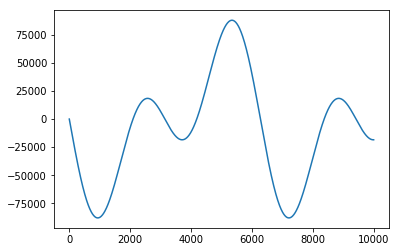

In [71]:
t1 = np.linspace(0.0,Ttotal/100,num = 1000)
plt.plot(t1,displacement_load(t1))